## ***EXPLORATORY DATA ANALYSIS ON ECOMMERCE DATA***

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Importing the DataSets

In [2]:
ecomm = pd.read_csv('ecommerce.csv')

## View Information

In [3]:
ecomm.shape

(9994, 22)

In [4]:
ecomm.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Price,Quantity,Discount,Profit,Sales
0,7981,CA-2014-103800,03-01-2014,07-01-2014,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.55,32.696
1,740,CA-2014-112326,04-01-2014,08-01-2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.27,35.152
2,741,CA-2014-112326,04-01-2014,08-01-2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.77,818.008
3,742,CA-2014-112326,04-01-2014,08-01-2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.49,6.280
4,1760,CA-2014-141817,05-01-2014,12-01-2014,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.88,58.408


In [5]:
ecomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Price          9994 non-null   float64
 18  Quantity

In [6]:
ecomm.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Price', 'Quantity', 'Discount', 'Profit', 'Sales'],
      dtype='object')

In [7]:
ecomm.count()

Row ID           9994
Order ID         9994
Order Date       9994
Ship Date        9994
Ship Mode        9994
Customer ID      9994
Customer Name    9994
Segment          9994
Country          9994
City             9994
State            9994
Postal Code      9994
Region           9994
Product ID       9994
Category         9994
Sub-Category     9994
Product Name     9994
Price            9994
Quantity         9994
Discount         9994
Profit           9994
Sales            9994
dtype: int64

In [8]:
ecomm.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Price            5825
Quantity           14
Discount           12
Profit           5159
Sales            6526
dtype: int64

## Check Missing Values

In [9]:
ecomm.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Price            0
Quantity         0
Discount         0
Profit           0
Sales            0
dtype: int64

## Check Duplicates

In [10]:
ecomm.duplicated().sum()

0

## Rename the columns and replace _ for Spaces

In [11]:
ecomm.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Price', 'Quantity', 'Discount', 'Profit', 'Sales'],
      dtype='object')

In [12]:
ecomm.columns = [i.replace(' ', '_') for i in ecomm.columns]

In [13]:
ecomm.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub-Category',
       'Product_Name', 'Price', 'Quantity', 'Discount', 'Profit', 'Sales'],
      dtype='object')

## Convert the datatype

In [14]:
ecomm['Order_Date'] = pd.to_datetime(ecomm['Order_Date'], format = '%d-%m-%Y')

In [15]:
ecomm['Ship_Date'] = pd.to_datetime(ecomm['Ship_Date'], format = '%d-%m-%Y')

In [16]:
ecomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9994 non-null   int64         
 1   Order_ID       9994 non-null   object        
 2   Order_Date     9994 non-null   datetime64[ns]
 3   Ship_Date      9994 non-null   datetime64[ns]
 4   Ship_Mode      9994 non-null   object        
 5   Customer_ID    9994 non-null   object        
 6   Customer_Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal_Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product_ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## BAR CHART

## Sales By Region

In [17]:
sales_by_region = ecomm.groupby('Region')['Sales'].sum().reset_index()

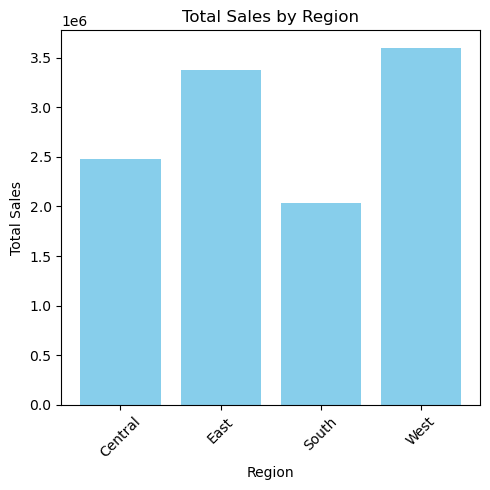

In [18]:
plt.figure(figsize=(5, 5))
plt.bar(sales_by_region['Region'], sales_by_region['Sales'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Profit By Region

In [19]:
Profit_by_region = ecomm.groupby('Region')['Profit'].sum().reset_index()

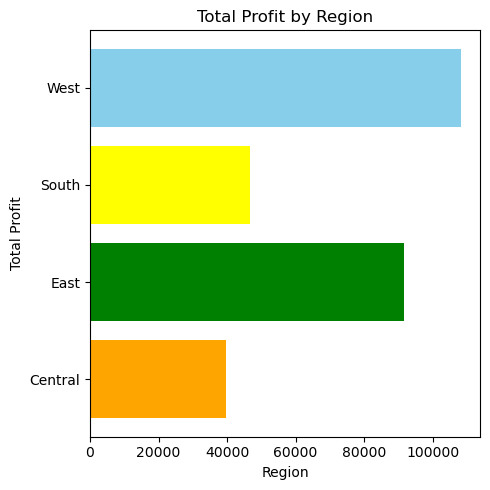

In [20]:
plt.figure(figsize=(5, 5))
plt.barh(Profit_by_region['Region'], Profit_by_region['Profit'], color= ['orange', 'green', 'yellow', 'skyblue'])
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.title('Total Profit by Region')
plt.tight_layout()
plt.show()

## BAR PLOT

## Sales By Region and Category

In [21]:
sales_by_region_category = ecomm.groupby(['Region', 'Category'])['Sales'].sum().reset_index()

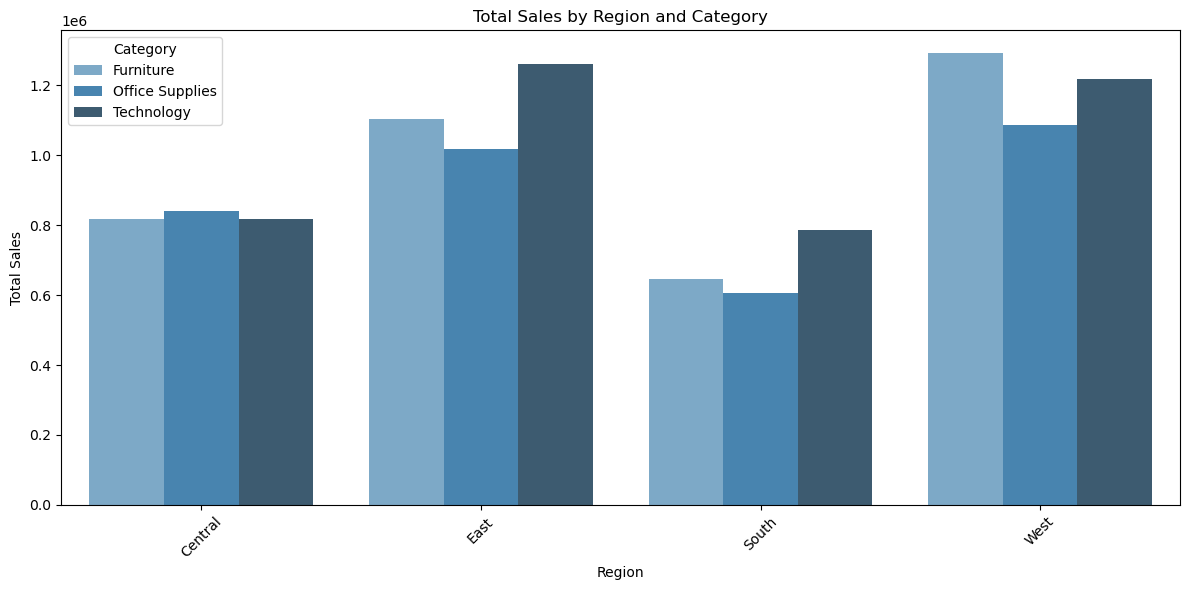

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', hue='Category', data=sales_by_region_category, palette='Blues_d')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## LINE - CHART

## Sales Trend by Year

In [23]:
ecomm['Year'] = ecomm['Order_Date'].dt.year

In [24]:
sales_trend_by_year = ecomm.groupby('Year')['Sales'].sum().reset_index()

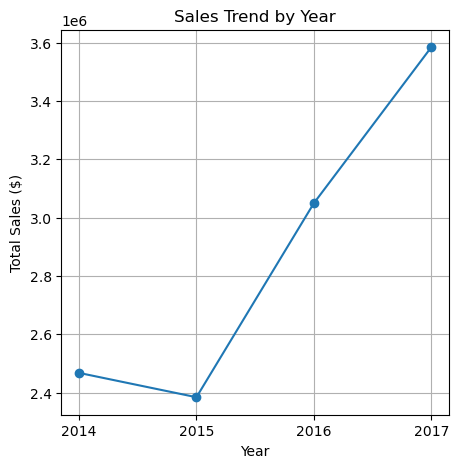

In [25]:
plt.figure(figsize=(5, 5))
plt.plot(sales_trend_by_year['Year'], sales_trend_by_year['Sales'], marker='o')
plt.title('Sales Trend by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales ($)')
plt.grid()
plt.xticks(sales_trend_by_year['Year'])
plt.show()

## Profit Trend over Years

In [26]:
profit_trend_by_year = ecomm.groupby('Year')['Profit'].sum().reset_index()

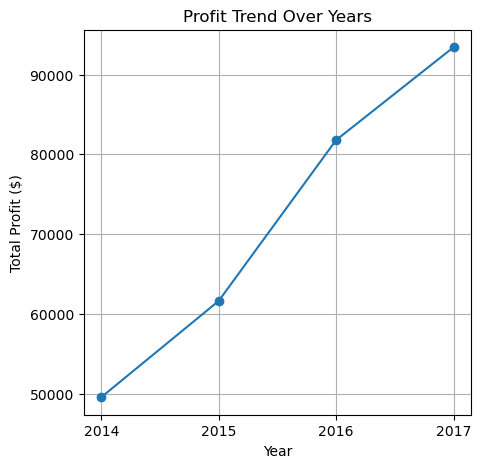

In [27]:
plt.figure(figsize=(5, 5))
plt.plot(profit_trend_by_year['Year'], profit_trend_by_year['Profit'], marker='o')
plt.title('Profit Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Total Profit ($)')
plt.grid()
plt.xticks(profit_trend_by_year['Year'])
plt.show()

## PIE - CHART

## % composition of Profit by Sub-Category

In [28]:
profit_by_subcategory = ecomm.groupby('Sub-Category')['Profit'].sum().reset_index()
total_profit = profit_by_subcategory['Profit'].sum()
profit_by_subcategory['Percentage'] = (profit_by_subcategory['Profit'] / total_profit) * 100

In [29]:
# Filter out negative percentages and avoid empty slices
profit_by_subcategory = profit_by_subcategory[profit_by_subcategory['Percentage'] >= 0]

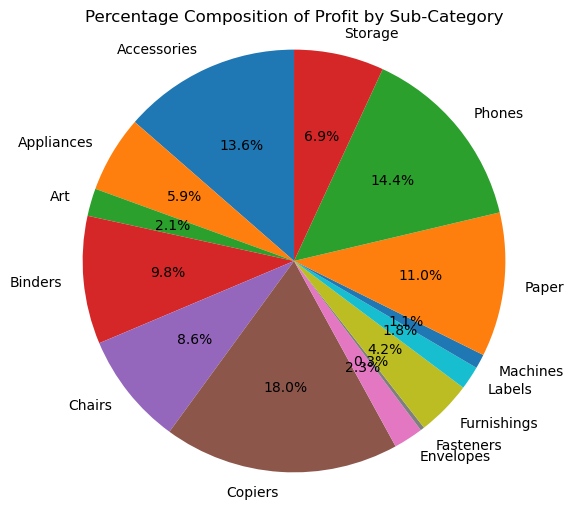

In [30]:
plt.figure(figsize=(6, 6))
plt.pie(profit_by_subcategory['Percentage'], labels=profit_by_subcategory['Sub-Category'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage Composition of Profit by Sub-Category')
plt.axis('equal')
plt.show()

## % composition of Profit by Category

In [31]:
profit_by_category = ecomm.groupby('Category')['Profit'].sum().reset_index()
total_profit = profit_by_category['Profit'].sum()
profit_by_category['Percentage'] = (profit_by_category['Profit'] / total_profit) * 100

In [32]:
profit_by_category = profit_by_category[profit_by_category['Percentage'] >= 0]

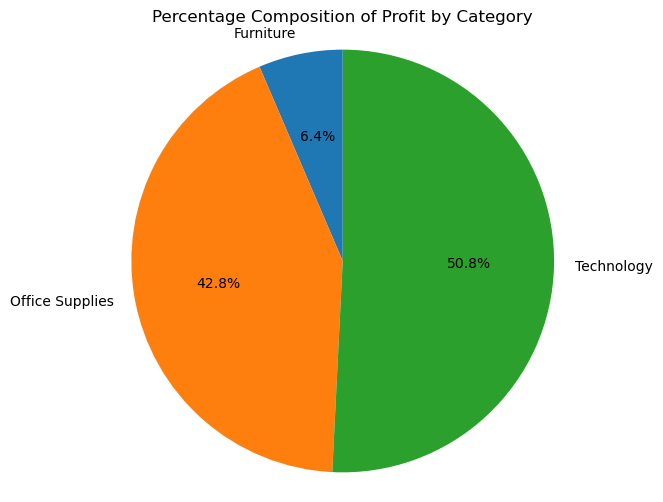

In [33]:
plt.figure(figsize=(6, 6))
plt.pie(profit_by_category['Percentage'], labels=profit_by_category['Category'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage Composition of Profit by Category')
plt.axis('equal')
plt.show()

## HISTOGRAMS

## Distribution of Sales over a period of time

In [34]:
ecomm['Month'] = ecomm['Order_Date'].dt.to_period('M')

In [35]:
ecomm.Sales.describe()

count      9994.000000
mean       1149.339702
std        3898.671244
min          -0.356000
25%          48.477000
50%         183.680000
75%         763.151500
max      135830.380000
Name: Sales, dtype: float64

In [36]:
135830.380000 - (-0.356000)

135830.736

In [37]:
140000/10000

14.0

In [38]:
140000/20000

7.0

In [39]:
Sales_group = pd.Series(pd.cut(ecomm.Sales, range(0,140000,20000)))

In [40]:
Sales_group

0       (0, 20000]
1       (0, 20000]
2       (0, 20000]
3       (0, 20000]
4       (0, 20000]
           ...    
9989    (0, 20000]
9990    (0, 20000]
9991    (0, 20000]
9992    (0, 20000]
9993    (0, 20000]
Name: Sales, Length: 9994, dtype: category
Categories (6, interval[int64, right]): [(0, 20000] < (20000, 40000] < (40000, 60000] < (60000, 80000] < (80000, 100000] < (100000, 120000]]

In [41]:
ecomm['Sales_group'] = Sales_group

In [42]:
ecomm.groupby('Sales_group')['Month'].nunique()

C:\Users\VJahn\AppData\Local\Temp\ipykernel_62920\3030200852.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ecomm.groupby('Sales_group')['Month'].nunique()


Sales_group
(0, 20000]          48
(20000, 40000]      26
(40000, 60000]      11
(60000, 80000]       2
(80000, 100000]      1
(100000, 120000]     0
Name: Month, dtype: int64

In [43]:
obj_1 = pd.DataFrame(ecomm.groupby('Sales_group')['Month'].nunique())
obj_1

C:\Users\VJahn\AppData\Local\Temp\ipykernel_62920\2525392263.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obj_1 = pd.DataFrame(ecomm.groupby('Sales_group')['Month'].nunique())


,Month
Sales_group,
"(0, 20000]",48
"(20000, 40000]",26
"(40000, 60000]",11
"(60000, 80000]",2
"(80000, 100000]",1
"(100000, 120000]",0


In [44]:
obj_1.reset_index(inplace =  True)
obj_1

,Sales_group,Month
0,"(0, 20000]",48
1,"(20000, 40000]",26
2,"(40000, 60000]",11
3,"(60000, 80000]",2
4,"(80000, 100000]",1
5,"(100000, 120000]",0


In [45]:
Tot_unq_month = ecomm.Month.nunique()
Tot_unq_month

48

In [46]:
obj_1['Percent_of_months'] = obj_1['Month']/48
obj_1

,Sales_group,Month,Percent_of_months
0,"(0, 20000]",48,1.000000
1,"(20000, 40000]",26,0.541667
2,"(40000, 60000]",11,0.229167
3,"(60000, 80000]",2,0.041667
4,"(80000, 100000]",1,0.020833
5,"(100000, 120000]",0,0.000000


C:\Users\VJahn\AppData\Local\Temp\ipykernel_62920\524422118.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ecomm.groupby('Sales_group')['Month'].nunique().plot(kind = 'hist', fontsize=10, color ='#e6b0aa')


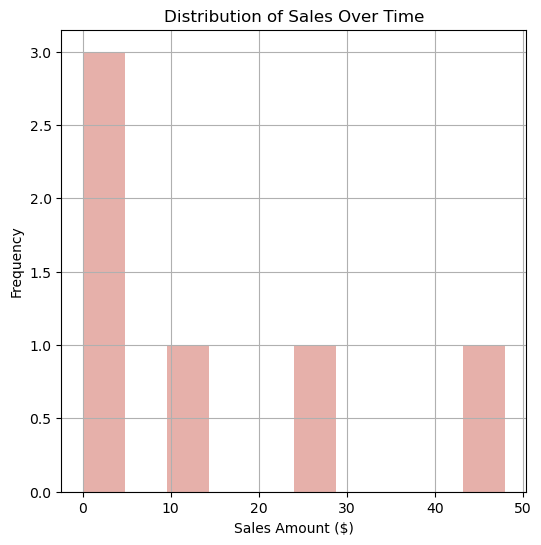

In [48]:
plt.figure(figsize=(6, 6))
ecomm.groupby('Sales_group')['Month'].nunique().plot(kind = 'hist', fontsize=10, color ='#e6b0aa')
plt.title('Distribution of Sales Over Time')
plt.xlabel('Sales Amount ($)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

## Distribution of Sales by no.of customers

In [49]:
ecomm.groupby('Sales_group')['Customer_ID'].nunique()

C:\Users\VJahn\AppData\Local\Temp\ipykernel_62920\4086074964.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ecomm.groupby('Sales_group')['Customer_ID'].nunique()


Sales_group
(0, 20000]          793
(20000, 40000]       57
(40000, 60000]       11
(60000, 80000]        2
(80000, 100000]       1
(100000, 120000]      0
Name: Customer_ID, dtype: int64

In [50]:
obj_2 = pd.DataFrame(ecomm.groupby('Sales_group')['Customer_ID'].nunique())
obj_2

C:\Users\VJahn\AppData\Local\Temp\ipykernel_62920\1640599162.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obj_2 = pd.DataFrame(ecomm.groupby('Sales_group')['Customer_ID'].nunique())


,Customer_ID
Sales_group,
"(0, 20000]",793
"(20000, 40000]",57
"(40000, 60000]",11
"(60000, 80000]",2
"(80000, 100000]",1
"(100000, 120000]",0


In [51]:
obj_2.reset_index(inplace =  True)
obj_2

,Sales_group,Customer_ID
0,"(0, 20000]",793
1,"(20000, 40000]",57
2,"(40000, 60000]",11
3,"(60000, 80000]",2
4,"(80000, 100000]",1
5,"(100000, 120000]",0


In [53]:
Tot_unq_cust = ecomm.Customer_ID.nunique()
Tot_unq_cust

793

In [54]:
obj_2['Percent_of_customers'] = obj_2['Customer_ID']/793
obj_2

,Sales_group,Customer_ID,Percent_of_customers
0,"(0, 20000]",793,1.000000
1,"(20000, 40000]",57,0.071879
2,"(40000, 60000]",11,0.013871
3,"(60000, 80000]",2,0.002522
4,"(80000, 100000]",1,0.001261
5,"(100000, 120000]",0,0.000000


C:\Users\VJahn\AppData\Local\Temp\ipykernel_62920\2276922336.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ecomm.groupby('Sales_group')['Customer_ID'].nunique().plot(kind = 'hist', fontsize=10, color ='orange')


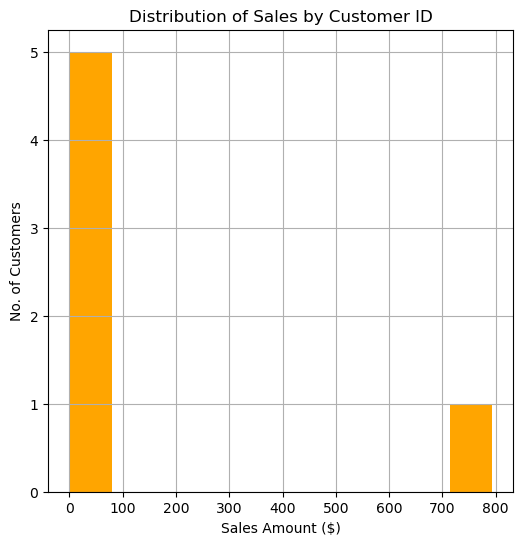

In [55]:
plt.figure(figsize=(6, 6))
ecomm.groupby('Sales_group')['Customer_ID'].nunique().plot(kind = 'hist', fontsize=10, color ='orange')
plt.title('Distribution of Sales by Customer ID')
plt.xlabel('Sales Amount ($)')
plt.ylabel('No. of Customers')
plt.grid()
plt.show()

## SCATTER PLOT

## Sales vs Profit

In [57]:
print(ecomm[['Sales', 'Profit']].isnull().sum())

Sales     0
Profit    0
dtype: int64


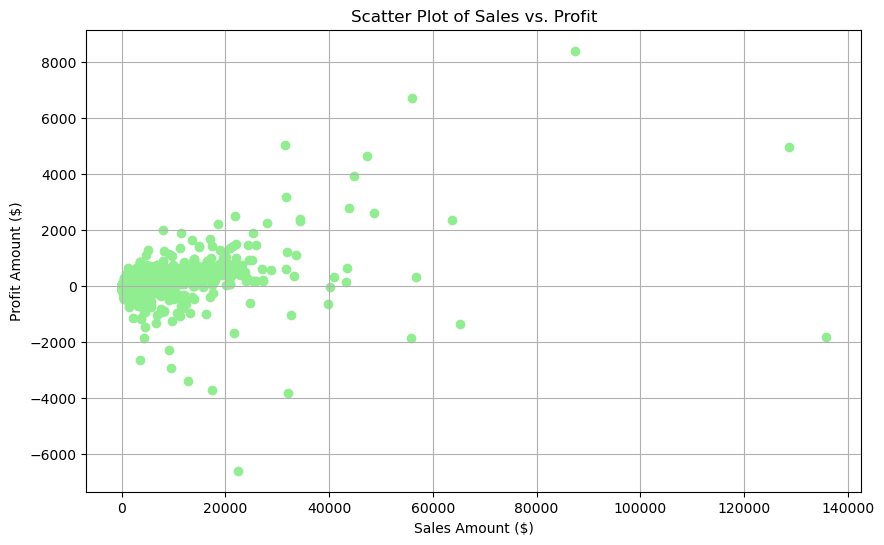

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(ecomm['Sales'], ecomm['Profit'], color='lightgreen')
plt.title('Scatter Plot of Sales vs. Profit')
plt.xlabel('Sales Amount ($)')
plt.ylabel('Profit Amount ($)')
plt.grid()
plt.show()

## Sales Vs Profit Analysis By Segment

In [59]:
seg_sale_profit = ecomm.groupby('Segment').agg(total_sales=('Sales', 'sum'), total_profit=('Profit', 'sum')).reset_index()

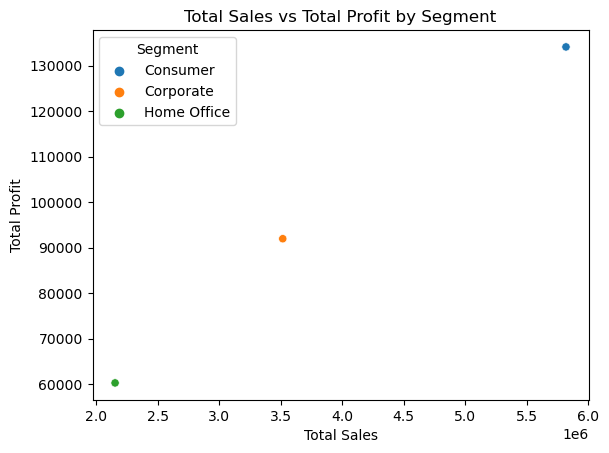

In [60]:
sns.scatterplot(data=seg_sale_profit, x='total_sales', y='total_profit', hue='Segment')
plt.title('Total Sales vs Total Profit by Segment')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.show()

## CORRELATION

In [61]:
corl = ecomm.select_dtypes(include = ['int', 'float']).corrwith(ecomm['Sales']).abs().sort_values(ascending = False)

In [62]:
print(corl)

Sales          1.000000
Price          0.914255
Profit         0.410040
Quantity       0.331014
Discount       0.024992
Postal_Code    0.022618
Year           0.012465
Row_ID         0.000901
dtype: float64


In [63]:
obj_3 = ecomm.select_dtypes(['int', 'float'])
obj_3.head()

,Row_ID,Postal_Code,Price,Quantity,Discount,Profit,Sales,Year
0,7981,77095,16.448,2,0.2,5.55,32.696,2014
1,740,60540,11.784,3,0.2,4.27,35.152,2014
2,741,60540,272.736,3,0.2,-64.77,818.008,2014
3,742,60540,3.540,2,0.8,-5.49,6.280,2014
4,1760,19143,19.536,3,0.2,4.88,58.408,2014


In [64]:
obj_3.corrwith(obj_3['Sales']).abs().sort_values(ascending = False)

Sales          1.000000
Price          0.914255
Profit         0.410040
Quantity       0.331014
Discount       0.024992
Postal_Code    0.022618
Year           0.012465
Row_ID         0.000901
dtype: float64

<Axes: >

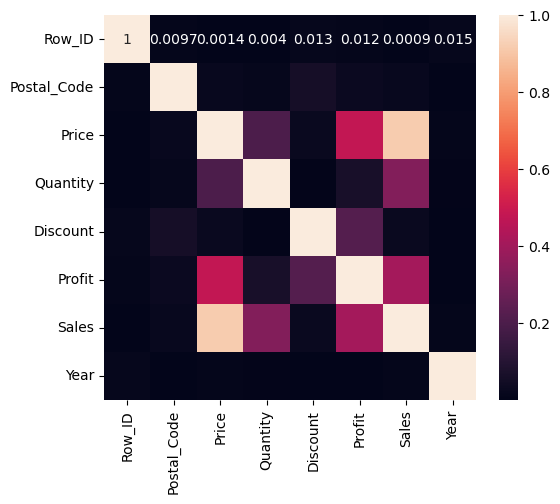

In [65]:
plt.figure(figsize = (6,5))
sns.heatmap(obj_3.corr().abs(), annot = True)

## BOX PLOT

<Axes: >

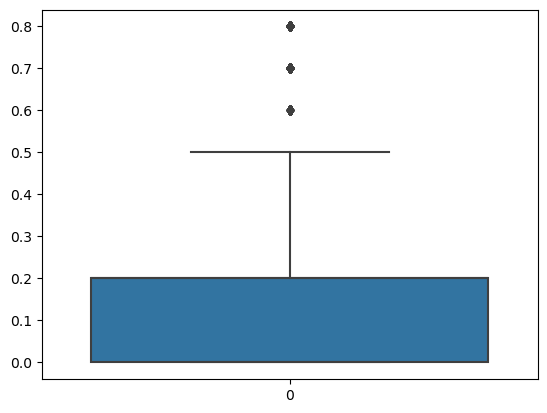

In [67]:
sns.boxplot(ecomm.Discount)

In [69]:
Q1 = ecomm.Discount.quantile(0.25)
Q1

0.0

In [70]:
Q3 = ecomm.Discount.quantile(0.75)
Q3

0.2

In [71]:
IQR = Q3-Q1
IQR

0.2

In [72]:
LC = Q1 - 1.5*IQR
LC

-0.30000000000000004

In [73]:
UC = Q3 + 1.5*IQR
UC

0.5

<Axes: >

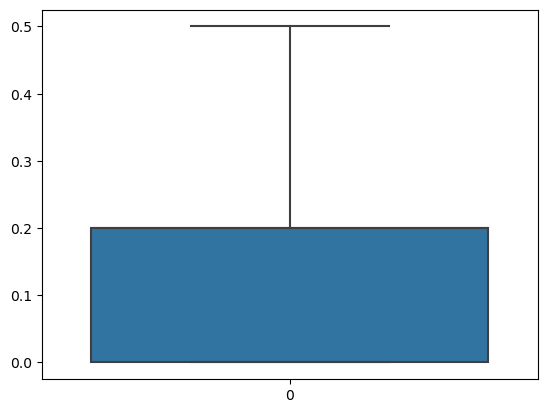

In [74]:
ecomm['Discount'] = ecomm['Discount'].clip(lower = LC, upper = UC)
sns.boxplot(ecomm.Discount)